In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
med= pd.read_csv('medium_data.csv')

In [2]:
med.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [3]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


In [44]:
nRowsRead = None
df1 = pd.read_csv('medium_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'medium_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6508 rows and 10 columns


In [45]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [46]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [47]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [48]:
df1.head(5)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


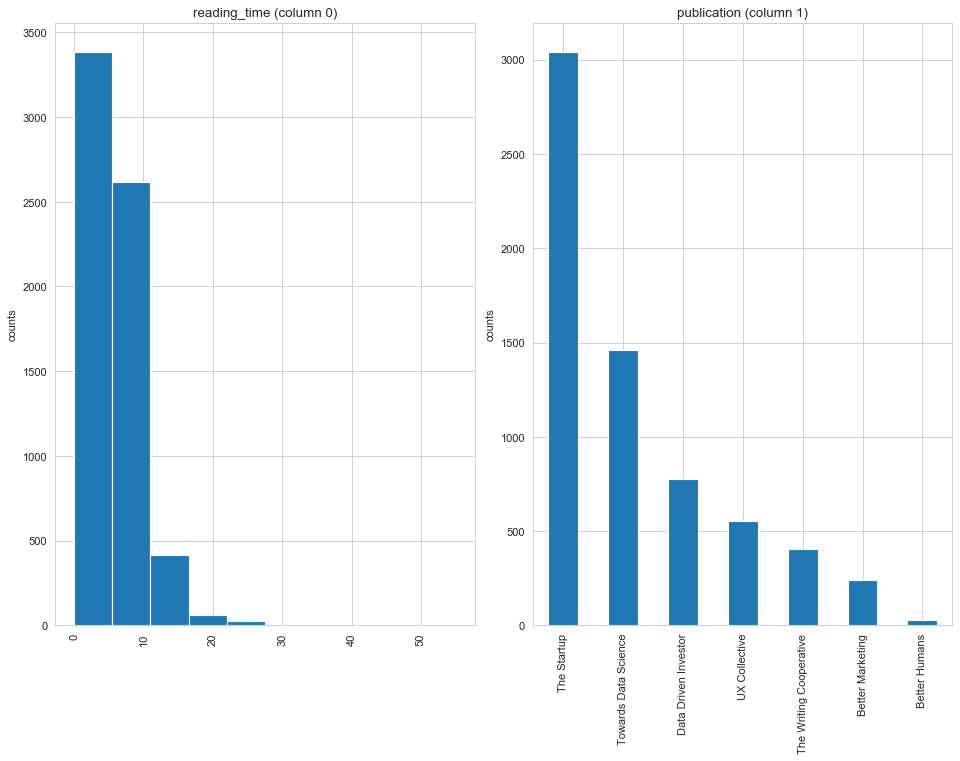

In [49]:
plotPerColumnDistribution(df1, 10, 5)

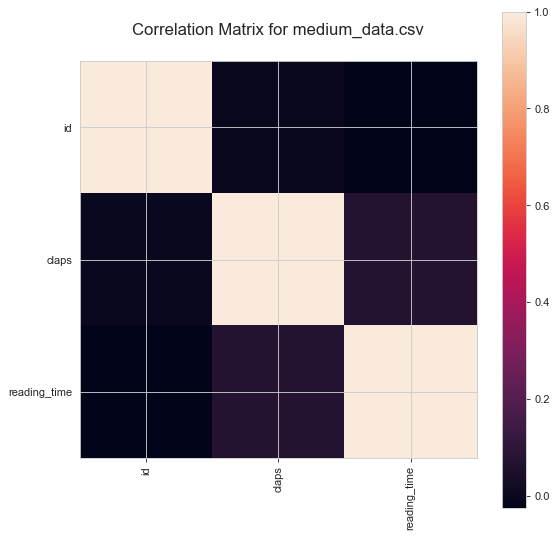

In [50]:
plotCorrelationMatrix(df1, 8)

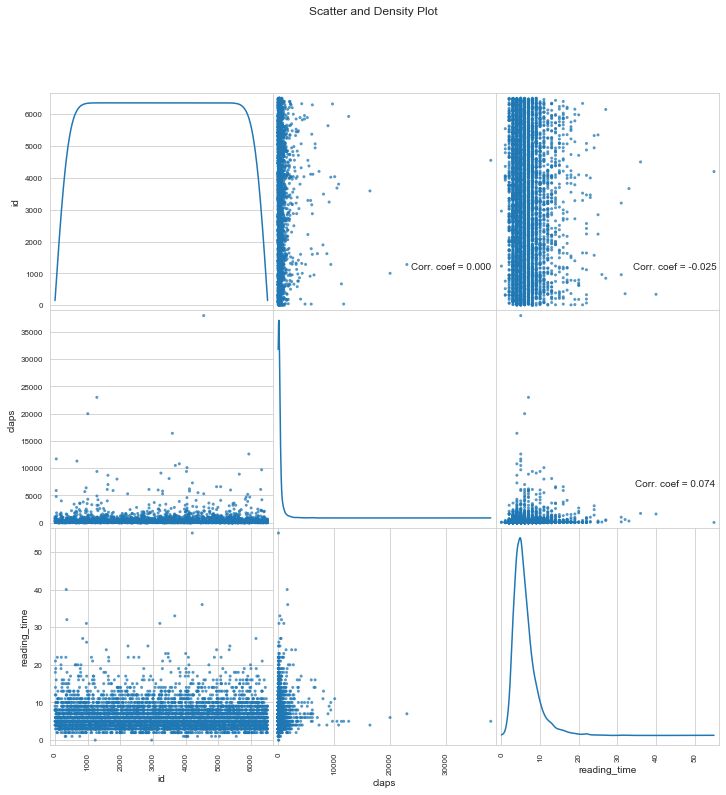

In [51]:
plotScatterMatrix(df1, 12, 10)

In [52]:
med.drop(columns=["url", "date"], inplace=True, axis=1)

subtitle    3029
image        147
dtype: int64


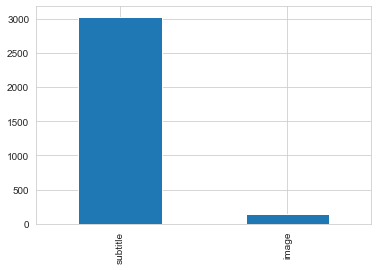

In [53]:
missing = med.isnull().sum()
missing = missing[missing>0]
print(missing)
missing.sort_values(ascending=False)
missing.plot.bar()

In [54]:
med["Has Image"] = med["image"].apply(lambda x: 0 if x is np.nan else 1)
med["Has Subtitle"] = med["subtitle"].apply(lambda x: 0 if x is np.nan else 1)
med["subtitle"] = med["subtitle"].apply(lambda x: "" if x is np.nan else x)
med["Length of Title"] = med["title"].apply(lambda x: len(x))
med["Length of subtitle"] = med["subtitle"].apply(lambda x: len(x))

In [55]:
df = pd.get_dummies(columns=["publication"], prefix="Pub", data=med)

In [56]:
df.head()

,id,title,subtitle,image,claps,responses,reading_time,Has Image,Has Subtitle,Length of Title,Length of subtitle,Pub_Better Humans,Pub_Better Marketing,Pub_Data Driven Investor,Pub_The Startup,Pub_The Writing Cooperative,Pub_Towards Data Science,Pub_UX Collective
0,1,A Beginner’s Guide to Word Embedding with Gens...,,1.png,850,8,8,1,0,63,0,0,0,0,0,0,1,0
1,2,Hands-on Graph Neural Networks with PyTorch & ...,,2.png,1100,11,9,1,0,63,0,0,0,0,0,0,1,0
2,3,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,1,1,28,32,0,0,0,0,0,1,0
3,4,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,1,1,59,39,0,0,0,0,0,1,0
4,5,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,1,1,69,31,0,0,0,0,0,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           6508 non-null   int64 
 1   title                        6508 non-null   object
 2   subtitle                     6508 non-null   object
 3   image                        6361 non-null   object
 4   claps                        6508 non-null   int64 
 5   responses                    6508 non-null   object
 6   reading_time                 6508 non-null   int64 
 7   Has Image                    6508 non-null   int64 
 8   Has Subtitle                 6508 non-null   int64 
 9   Length of Title              6508 non-null   int64 
 10  Length of subtitle           6508 non-null   int64 
 11  Pub_Better Humans            6508 non-null   uint8 
 12  Pub_Better Marketing         6508 non-null   uint8 
 13  Pub_Data Driven Investor     6508

In [58]:
df.columns

Index(['id', 'title', 'subtitle', 'image', 'claps', 'responses',
       'reading_time', 'Has Image', 'Has Subtitle', 'Length of Title',
       'Length of subtitle', 'Pub_Better Humans', 'Pub_Better Marketing',
       'Pub_Data Driven Investor', 'Pub_The Startup',
       'Pub_The Writing Cooperative', 'Pub_Towards Data Science',
       'Pub_UX Collective'],
      dtype='object')

In [59]:
comparable_cols = ["claps","responses","reading_time","Has Subtitle","Has Image","Length of Title","Length of subtitle"]

ValueError: could not convert string to float: 'Read'

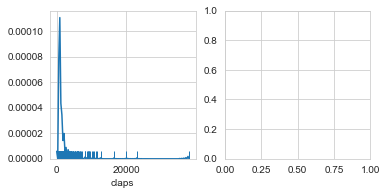

In [60]:
fig = plt.figure(figsize=(12,6))

for i in range(len(comparable_cols)):
    fig.add_subplot(2,4,i+1)
    sns.distplot(df[comparable_cols[i]].iloc[:], rug=True, hist=False, kde_kws={"bw":0.01})
    
plt.tight_layout()

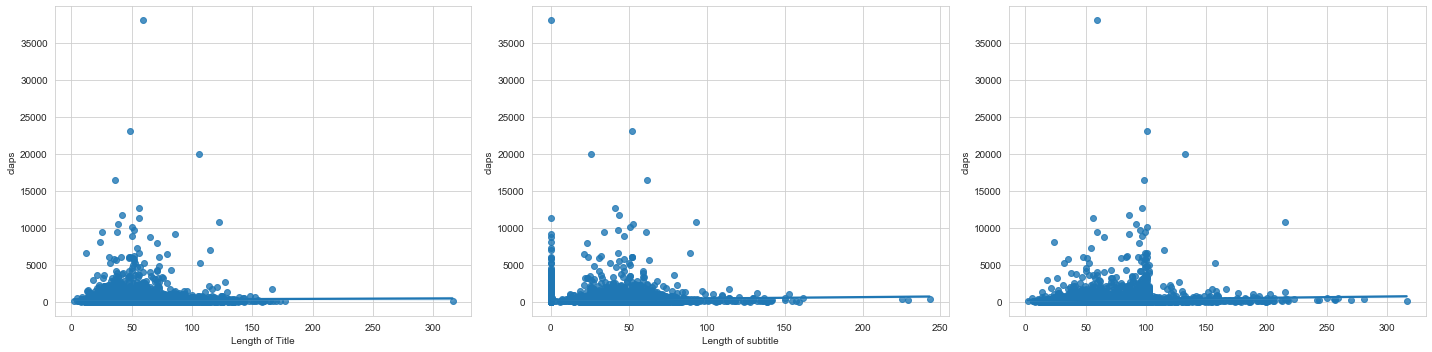

In [61]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(20,5)
sns.regplot(x=df["Length of Title"], y=df["claps"], ax=ax1)
sns.regplot(x=df["Length of subtitle"], y=df["claps"], ax=ax2)
sns.regplot(x=df["Length of Title"] + df["Length of subtitle"], y=df["claps"], ax=ax3)

plt.tight_layout()

In [62]:
corr = df.corr()
corr.claps

id                             0.000260
claps                          1.000000
reading_time                   0.074281
Has Image                      0.017951
Has Subtitle                   0.071985
Length of Title                0.012896
Length of subtitle             0.053685
Pub_Better Humans              0.104868
Pub_Better Marketing           0.107132
Pub_Data Driven Investor      -0.083733
Pub_The Startup               -0.007558
Pub_The Writing Cooperative    0.016666
Pub_Towards Data Science      -0.015531
Pub_UX Collective              0.022433
Name: claps, dtype: float64

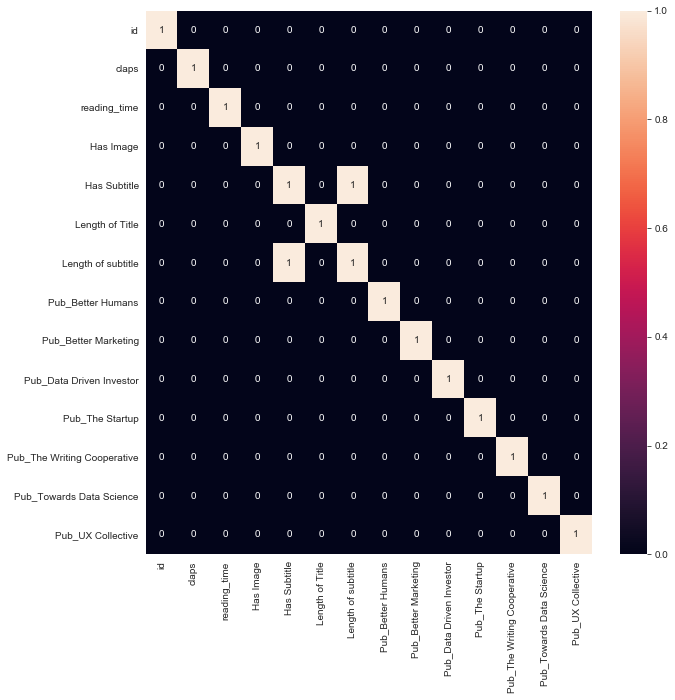

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True)

In [64]:
df["total length"] = df["Length of Title"] + df["Length of subtitle"]

In [65]:
corr = df.corr()
corr["claps"].sort_values(ascending=False)

claps                          1.000000
Pub_Better Marketing           0.107132
Pub_Better Humans              0.104868
reading_time                   0.074281
Has Subtitle                   0.071985
total length                   0.058391
Length of subtitle             0.053685
Pub_UX Collective              0.022433
Has Image                      0.017951
Pub_The Writing Cooperative    0.016666
Length of Title                0.012896
id                             0.000260
Pub_The Startup               -0.007558
Pub_Towards Data Science      -0.015531
Pub_Data Driven Investor      -0.083733
Name: claps, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [67]:
models = [["Linear Regression",LinearRegression()],
         ["KNN",KNeighborsRegressor(n_neighbors=1, n_jobs=-1)],
         ["Decision Tree", DecisionTreeRegressor()],
         ["Random Forest", RandomForestRegressor(n_estimators=100, n_jobs=-1)],
         ["XGBoost", XGBRegressor(n_estimators=500, n_jobs=-1, learning_rate=0.05)]]

In [68]:
X = df.drop(["claps"], axis=1)
y = df.claps

#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [69]:
LinearRegression.fit(X_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'